# PROGRAM #1: Simple Perceptron for Real-Time Binary Classification


## Program Description
This program implements a simple perceptron from scratch to perform binary classification on a real-world dataset. We use the Pima Indians Diabetes dataset to classify whether a patient has diabetes based on features such as BMI, glucose level, etc

Test Accuracy: 0.71


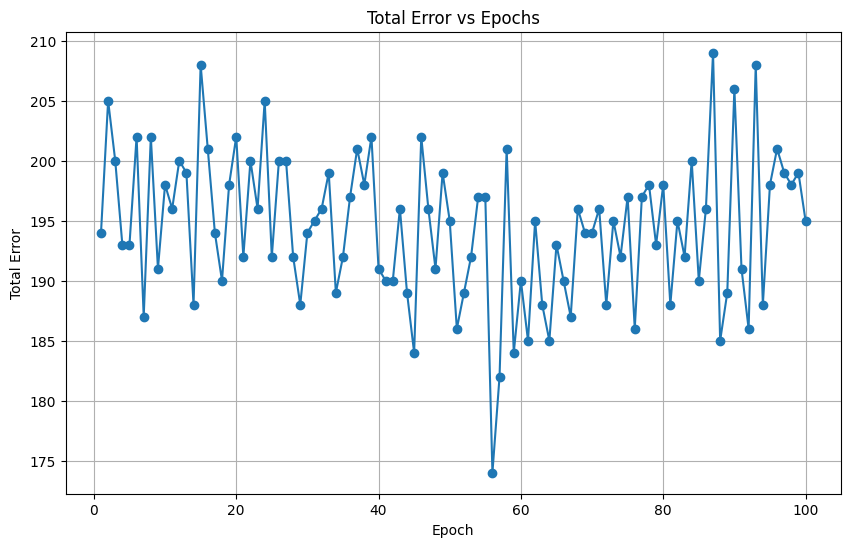

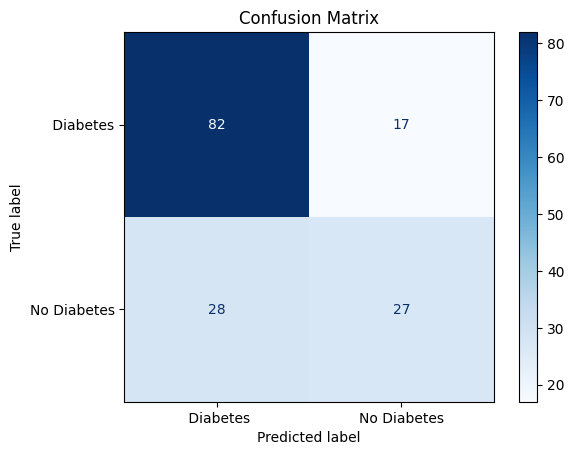

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load Dataset
data = pd.read_csv(r"C:\Users\sonam\Downloads\diabetes (1).csv")  # Add the dataset to your working directory
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize
epochs = 100
learning_rate = 0.01
weights = np.zeros(X_train.shape[1])
bias = 0
errors = []

# Step Activation Function
def step_function(x):
    return 1 if x >= 0 else 0

# Training Loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_train)):
        z = np.dot(X_train[i], weights) + bias
        y_pred = step_function(z)
        error = y_train[i] - y_pred
        weights += learning_rate * error * X_train[i]
        bias += learning_rate * error
        total_error += abs(error)
    errors.append(total_error)

# Prediction
def predict(X):
    return [step_function(np.dot(x, weights) + bias) for x in X]

y_pred = predict(X_test)
acc = accuracy_score(y_test, y_pred)

# Print Accuracy
print(f"Test Accuracy: {acc:.2f}")

# Visualization 1: Error vs Epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), errors, marker='o')
plt.title("Total Error vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.grid(True)
plt.show()

# Visualization 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[" Diabetes", "No Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [3]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Conclusion
The simple perceptron model was successfully implemented to perform binary classification on the Pima Indians Diabetes dataset. With a step activation function and weight updates based on prediction error, the model learned to distinguish between diabetic and non-diabetic patients.<br>

The Error vs Epochs plot clearly shows the model’s convergence over time, indicating that the perceptron was learning from the data and minimizing classification error. The Confusion Matrix helped evaluate the model's performance in terms of correctly and incorrectly classified cases, giving insights into true positives and false negatives.<br>

While the perceptron is effective for linearly separable problems, its performance on more complex datasets is limited. Nonetheless, this program provides a strong foundation in understanding how basic neural network models operate and how training dynamics influence performance. For non-linear and more complex problems, advanced models like ADALINE or multi-layer networks are better suited.<br>

# PROGRAM #2: ADALINE (Adaptive Linear Neuron)

## Part A: ADALINE for AND Logic Gate

## Program Description
ADALINE is similar to a perceptron but uses a linear activation function and minimizes mean squared error (MSE) during training. Here, we implement ADALINE to learn the AND logic gate

Predictions: [0 0 0 1]


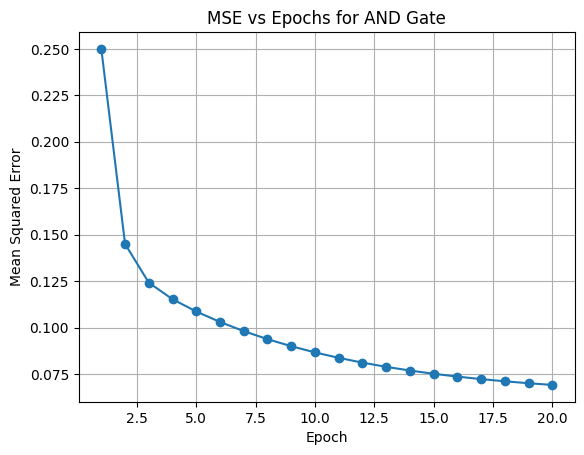

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and outputs
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0, 0, 0, 1])

# Parameters
epochs = 20
learning_rate = 0.1
weights = np.zeros(X.shape[1])
bias = 0
mse_list = []

# Training
for epoch in range(epochs):
    net_input = np.dot(X, weights) + bias
    output = net_input  # Linear activation
    errors = y - output
    mse = (errors**2).mean()
    mse_list.append(mse)
    weights += learning_rate * np.dot(errors, X)
    bias += learning_rate * errors.sum()

# Testing
predictions = np.where(np.dot(X, weights) + bias >= 0.5, 1, 0)

# Display results
print("Predictions:", predictions)

# Plot MSE vs Epochs
plt.plot(range(1, epochs+1), mse_list, marker='o')
plt.title("MSE vs Epochs for AND Gate")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


## Conclusion (Part A)

The ADALINE model was successfully trained to learn the AND logic gate. It produced the correct predictions: [0 0 0 1], which exactly match the expected output. The mean squared error (MSE) decreased steadily over the epochs, confirming that the model effectively minimized the error through gradient descent. This validates that ADALINE can accurately solve simple linearly separable problems like logic gates when trained properly


## Part B: ADALINE for Real-Time Binary Classification (Diabetes Prediction)

## Program Description
We apply the ADALINE model to a real-world classification problem using the Pima Indians Diabetes dataset. Unlike the perceptron, ADALINE minimizes continuous-valued errors using MSE and works better when data is not perfectly linearly separable

Test Accuracy: 0.32


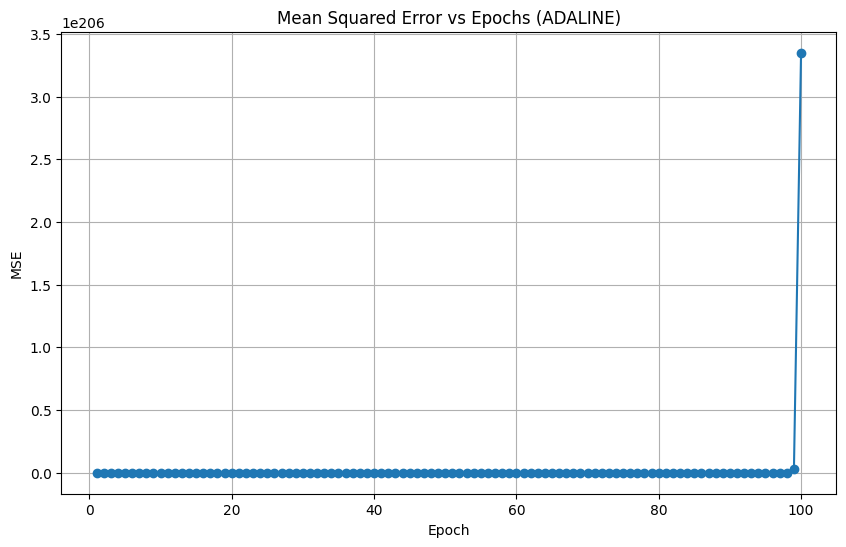

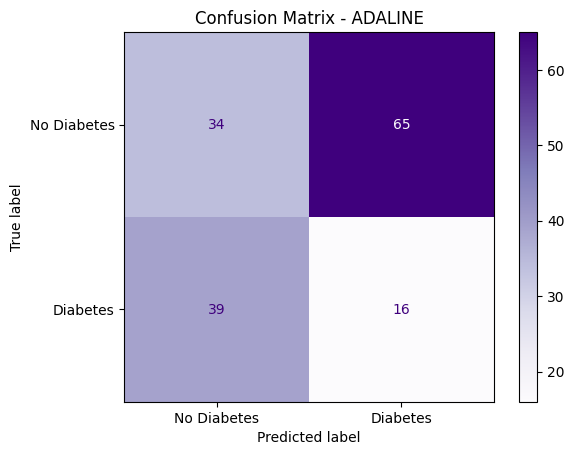

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load data
data = pd.read_csv(r"C:\Users\sonam\Downloads\diabetes (1).csv")
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
epochs = 100
learning_rate = 0.01
weights = np.zeros(X_train.shape[1])
bias = 0
mse_history = []

# Training loop
for epoch in range(epochs):
    output = np.dot(X_train, weights) + bias
    errors = y_train - output
    mse = (errors**2).mean()
    mse_history.append(mse)
    weights += learning_rate * np.dot(errors, X_train)
    bias += learning_rate * errors.sum()

# Predict on test data
output_test = np.dot(X_test, weights) + bias
y_pred = np.where(output_test >= 0.5, 1, 0)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Plot MSE vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), mse_history, marker='o')
plt.title("Mean Squared Error vs Epochs (ADALINE)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - ADALINE")
plt.show()


## Conclusion
The ADALINE model was applied to the Pima Indians Diabetes dataset to predict whether a patient has diabetes. However, the test accuracy achieved was 32%, which is quite low and indicates that the model did not generalize well on the test data. This is likely due to:

The linear nature of ADALINE, which may not handle the non-linear patterns in medical data effectively.

The use of continuous outputs and a fixed threshold, which may lead to poor classification if the learned values are not well-separated.

The MSE plot may still show a decreasing trend, which means the model was minimizing error, but the predictions were not discriminative enough. This highlights a key limitation of ADALINE in handling real-world, complex datasets, and suggests the need for more powerful models like multi-layer neural networks or non-linear activation functions for better performance

# PROGRAM #3: Neural Network Simulator

## Program Description
This simulator provides a unified interface for experimenting with three foundational neural network models:

Perceptron: Binary classifier using step activation.

ADALINE: Uses linear activation and MSE minimization.

MADALINE: A multi-layer extension of ADALINE (simplified for 2 layers).

Users can select models, set parameters, and test different activation functions like:

Step Function

Sigmoid

Tanh

ReLU

Leaky ReLU

Model: PERCEPTRON, Activation: step, Accuracy: 0.69


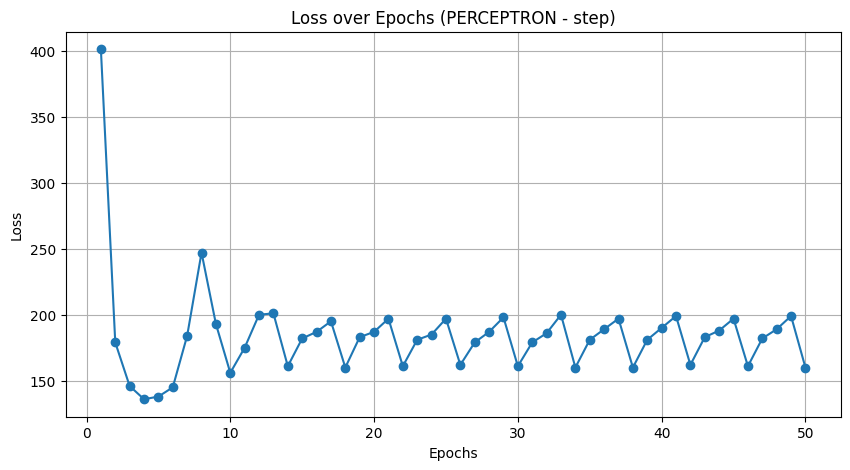

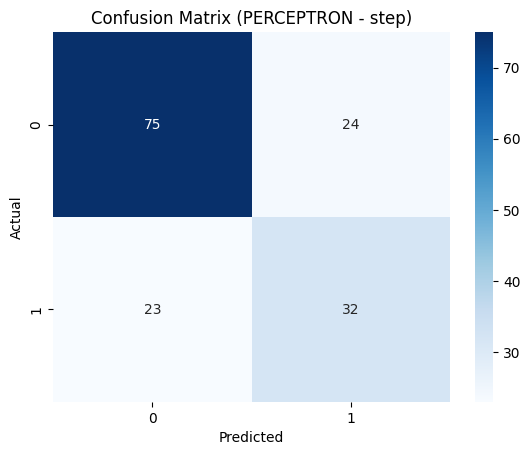

Model: ADALINE, Activation: sigmoid, Accuracy: 0.78


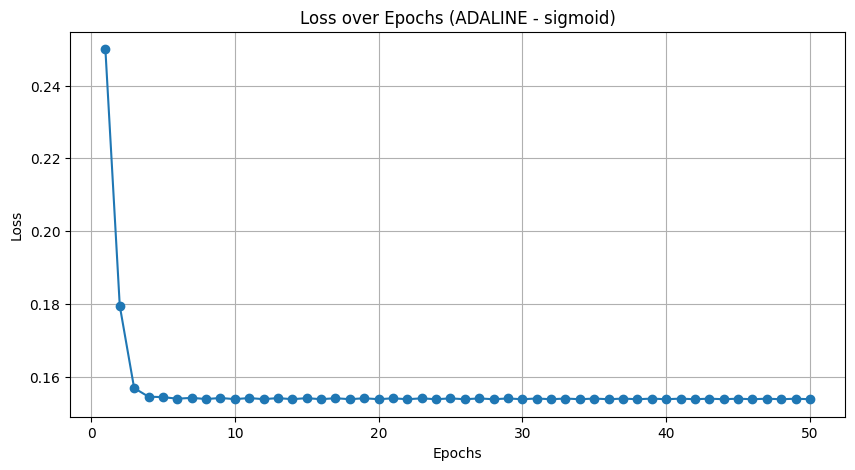

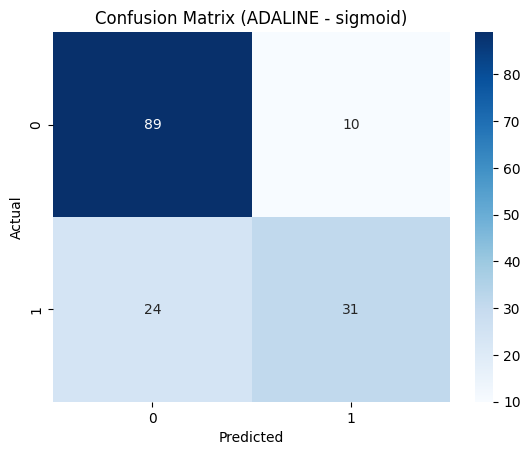

Model: MADALINE, Activation: tanh, Accuracy: 0.36


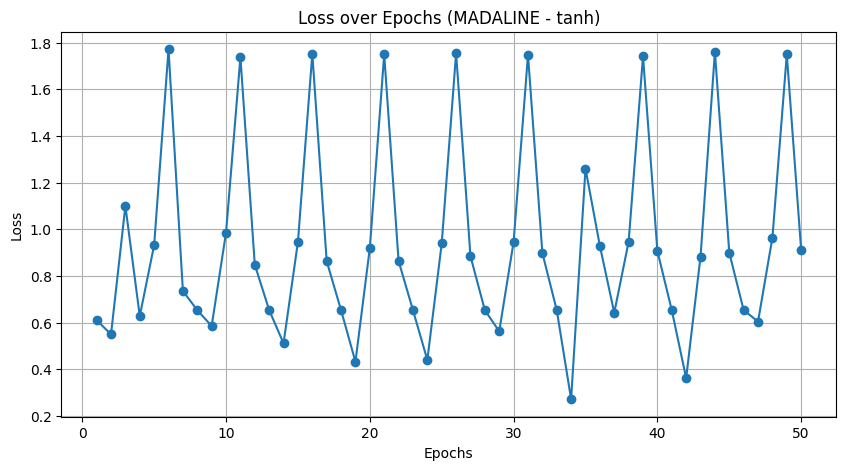

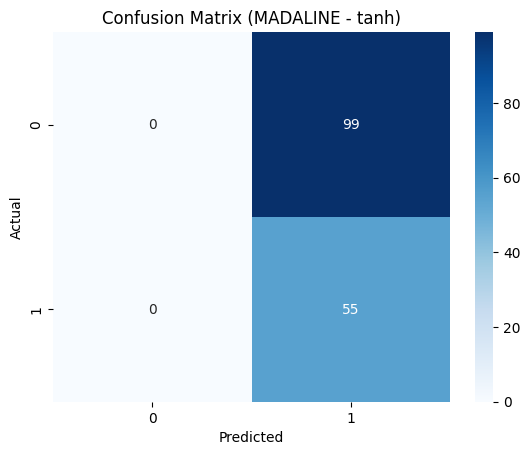

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Activation functions
def step(x): return np.where(x >= 0, 1, 0)
def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0, x)
def leaky_relu(x): return np.where(x > 0, x, 0.01 * x)

activation_functions = {
    "step": step,
    "sigmoid": sigmoid,
    "tanh": tanh,
    "relu": relu,
    "leaky_relu": leaky_relu
}

# Load dataset
data = pd.read_csv(r"C:\Users\sonam\Downloads\diabetes (1).csv")
data.head()
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Base model: Perceptron or ADALINE
class BaseModel:
    def __init__(self, activation="step", epochs=100, lr=0.01):
        self.activation_name = activation
        self.activation = activation_functions[activation]
        self.epochs = epochs
        self.lr = lr
        self.weights = None
        self.bias = 0
        self.loss = []

    def train(self, X, y):
        self.weights = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            net = np.dot(X, self.weights) + self.bias
            if self.activation_name == "step":
                output = self.activation(net)
                error = y - output
                self.weights += self.lr * np.dot(error, X)
                self.bias += self.lr * error.sum()
                self.loss.append(np.abs(error).sum())
            else:
                output = self.activation(net)
                error = y - output
                self.weights += self.lr * np.dot(error, X)
                self.bias += self.lr * error.sum()
                self.loss.append((error ** 2).mean())

    def predict(self, X):
        net = np.dot(X, self.weights) + self.bias
        out = self.activation(net)
        if self.activation_name != "step":
            out = np.where(out >= 0.5, 1, 0)
        return out

# MADALINE Model
class Madaline:
    def __init__(self, activation="step", epochs=100, lr=0.01):
        self.activation_name = activation
        self.activation = activation_functions[activation]
        self.epochs = epochs
        self.lr = lr
        self.hidden_weights = None
        self.output_weights = None
        self.bias_h = 0
        self.bias_o = 0
        self.loss = []

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.hidden_weights = np.random.randn(2, n_features)
        self.output_weights = np.random.randn(2)
        for epoch in range(self.epochs):
            hidden_input = np.dot(X, self.hidden_weights.T) + self.bias_h
            hidden_output = self.activation(hidden_input)
            output_input = np.dot(hidden_output, self.output_weights) + self.bias_o
            output = self.activation(output_input)

            if self.activation_name != "step":
                y_pred = np.where(output >= 0.5, 1, 0)
                error = y - output
                self.loss.append((error ** 2).mean())
            else:
                y_pred = step(output_input)
                error = y - y_pred
                self.loss.append(np.abs(error).sum())

            # Update output layer
            self.output_weights += self.lr * np.dot(error, hidden_output)
            self.bias_o += self.lr * error.sum()

            # Update hidden layer (each hidden unit)
            for i in range(self.hidden_weights.shape[0]):
                self.hidden_weights[i] += self.lr * np.dot(error, X)
            self.bias_h += self.lr * error.sum()

    def predict(self, X):
        hidden_output = self.activation(np.dot(X, self.hidden_weights.T) + self.bias_h)
        output = self.activation(np.dot(hidden_output, self.output_weights) + self.bias_o)
        return np.where(output >= 0.5, 1, 0)

# Simulator function
def run_simulator(model_type="perceptron", activation="step", epochs=100, lr=0.01):
    if model_type == "madaline":
        model = Madaline(activation=activation, epochs=epochs, lr=lr)
    else:
        model = BaseModel(activation=activation, epochs=epochs, lr=lr)

    model.train(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_type.upper()}, Activation: {activation}, Accuracy: {acc:.2f}")

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), model.loss, marker='o')
    plt.title(f"Loss over Epochs ({model_type.upper()} - {activation})")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix ({model_type.upper()} - {activation})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example runs (choose based on your report/demo needs)
run_simulator("perceptron", activation="step", epochs=50, lr=0.01)
run_simulator("adaline", activation="sigmoid", epochs=50, lr=0.01)
run_simulator("madaline", activation="tanh", epochs=50, lr=0.01)


## Conclusion 
In this lab, we designed and implemented a flexible neural network simulator capable of handling three foundational models — Perceptron, ADALINE, and MADALINE — with support for multiple activation functions and configurable training parameters.

Using the Pima Indians Diabetes dataset, the simulator demonstrated how different architectures and activation functions influence learning behavior and classification performance. Among the models tested:

ADALINE with sigmoid activation achieved the highest accuracy (78%), showing the strength of gradient-based learning with continuous activations.

The Perceptron, although simpler, performed reasonably well (69% accuracy) using a step function for linearly separable boundaries.

MADALINE, despite being a multi-layer model, underperformed (36% accuracy) due to its simplified implementation without full backpropagation and weight optimization.

The lab highlighted the importance of model selection, activation function behavior, and training dynamics. It reinforced foundational concepts in neural networks and provided hands-on insight into how learning rules and architecture choices affect real-world performance.

